How many French boxes can you fit in an alcove?
==========================

This is an attempt to use a genetic algorithm to try and understand how many uniform sized French boxes you can fit in the alcove under my stairs

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import randrange


In [31]:
# globals
max_room_x = 250
max_room_y = 210

##Approach to coding this

###Room object
The room can do or knows the following:
* What its dimensions are
* To be able to draw itself (maybe, this might need to be controlled via the simulation itself)
* To know what boxes are in it and where these boxes are
* From the above, the room can also understand if a box clashes with another box, and whether the box is in or outside of the room. This property will form the basis of calculating fitness for each layout of boxes in the room.

###Box object
Each box can do or knows the following:
* What its coordindates are
* How to draw a box (maybe, this might need to controlled via the simulation itself)

###Simulation aspect
There will need to be some code that orchestrates everything: that is, generates a room, adds boxes, runs the GA code, and provides a scoring. 

###Note to self
Do you need to go down the OO route? By looking at the Where's Waldo route, does the simulation need this additional level of structure?

###Fitness calculations
The fitness calculation should involve something like the following:
* For each additional box in the room, add a positive increment
* For each box clash, remove a certain amount
* For each box that is not in the room, remove a certain amount

###What does the Fitness calculation work on?
Where should the boxes "live" in the simulation? Are they a property of the room? ("Boxes exist in the room"?) Theoretically, yes. 

But what does this mean to our model? This seems that the room needs to have an ability to store boxes in it. There does need to be a collection of boxes somewhere in the model, so that the simulation can assess if there are clashes or similar. 

###How will the Fitness calculation work?
Imagine that we have a collection of boxes, box one, box two, ... box n. There would be a score associated with each collection, depending on a) how many boxes are in the collection, b) how many clash, and c) how many are in the room. 

Therefore a "population" here will be defined as a number of collections of boxes (I think). For example, generation one will be a population of say 100 box collections, so 100 scores. These can then be assessed for e.g. the top 10 scores. In turn, these 10 populations can mutate/similar so that the new generation of solutions is different. 

From a logic standpoint, it makes sense to do the calculations, then draw the results say after each 1/10 of complete simulation run time, e.g. if there are 10k iterations, plot the best result found so far about each 1k iterations. 

(Starting to think that the OO approach may be overblown. Ultimately there could be a cuter way to think about this, as I'm more interested in understanding clashes between boxes and those outside the room to a certain degree.)

## Additional thoughts

In theory, all you need to create is a bunch of starting positions for the boxes. So what is the bottom left coordinate of each box. Then the simulation needs to calculate the positions of the other coordinates, which is trival. From this, it is then a case of working out if each coordinate is in the room and whether it is clashing with another box.

This could be mocked up by having a list of starting box coordinates, each coordinate in essence representing a box. For each box in the list, firstly work out if all of its points are in the room, and if not, decrement the score accordingly. It makes sense to do this via a collection of methods, i.e. for each box in room, test if it is in room, then update score accordingly. 

The next step would be more difficult, but could be done via a nested loop. For each box in the list, check every other box in the list: does the box overlap? If this is not done via OO, there would be a lot of methods to get this to work, but should be quite simple from a functional perspective. 

Draw the room
-------------------------------

In [5]:
def get_box_coords(x, y):
    """"
        Returns the new box coords when given
        starting x,y position
    """
    
    x_length = 50 # assumed constant
    y_length = 40
    
    x_coords = [x, x + x_length, x + x_length, x, x]
    y_coords = [y, y, y + y_length, y + y_length, y]
    
    results = (x_coords, y_coords)
    return(results)

In [97]:
def draw_room():
    """
       Draw the basic room, setting axes also
    """
    
    plt.plot([0, 195, 195, 152, 0, 0], 
         [0, 0, 223, 223, 104, 0])
    plt.axis([-10, 210, -10, 250])
    plt.xticks([])
    plt.yticks([])
    

In [98]:
def draw_box(box):
    """
       Draw the box
    """
    
    plt.plot(box[0][0:5], 
             box[1][0:5])

## An attempt to develop a recursive function
Good luck everyone ...

In [137]:
def test_recursion(a):
    if len(a) > 0 :
        print("line is ", a[0])
        random_starts(a[1:])
        

In [138]:
test_recursion([0,1,2,3])

('line is ', 0)
('line is ', 1)
('line is ', 2)
('line is ', 3)


Ok, that seems to have worked. Note the use of the condition saying greater than zero, not less than a condition as originally specified. 

In [145]:
def random_coords(max_x, max_y):
    """
       When supplied the max x,y of the room, supply a random start postion
    """
    # x = rand # how do you do random numbers again?
    
    x,y = (10, 20)
    return(x, y)


In [146]:
random_coords(210 - 50, 250 - 40)

(10, 20)

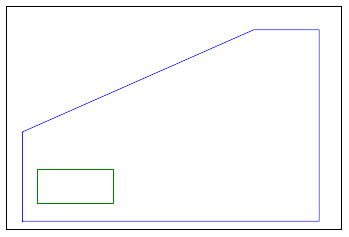

In [150]:
plt.figure()
draw_room()
coords = random_coords(210 - 50, 250 - 40)
t = get_box_coords(coords[0], coords[1])
draw_box(t)
plt.show()

##Build a box object

In [158]:
class Box:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.is_in_room = False
        

In [159]:
b = Box(10, 20)

In [161]:
b.x

10

##Room object

In [49]:
class Room:
    
    def __init__(self, width, height):
        self.width = width
        self.height = height
    
    def draw_room():
        """
           Draw the basic room, setting axes also
        """
    
        plt.plot([0, 195, 195, 152, 0, 0], 
                 [0, 0, 223, 223, 104, 0])
        plt.axis([-10, 210, -10, 250])
        plt.xticks([])
        plt.yticks([])
    

In [51]:
r = Room(250, 210)

plt.figure()
r.draw_room()
plt.show()

TypeError: draw_room() takes no arguments (1 given)

#Start from scratch

In [9]:
def getRandomBoxCoords(max_x, max_y):
    """
       Create random start coordinates for bottom left of box
       (x,y) are the max size of room
    """
    x = randrange(0, max_x)
    y = randrange(0, max_y)
    return(x,y)

In [17]:
getRandomBoxCoords(210, 250)

(181, 118)

In [18]:
def getBoxRightCoord(x):
    """
       Given an x coordinate, the left hand side of the box, what is the right hand x coordinate?
    """
    return (x + 50)

In [19]:
getBoxRightCoord(50)

100

In [24]:
def getBoxTopCoord(y):
    """
       Given a y coordinate, the bottom vertical of the box, what is the top y coordinate?
    """
    return (y + 40);

In [25]:
getBoxTopCoord(40)

80

In [33]:
b = getRandomBoxCoords(max_room_x, max_room_y)
print("b is: ", b)

bRightX = getBoxRightCoord(b[0])
print("bRightX is: ", bRightX)

bUpperY = getBoxTopCoord(b[1])
print("bUpperY is: ", bUpperY)

('b is: ', (87, 17))
('bRightX is: ', 137)
('bUpperY is: ', 57)


In [47]:
def isBoxInRoom(box_coord, max_room_condition):
    """
       Calculate whether the box coordinate is inside the limit of the room, which is supplied
    """
    
    result = False
    if (box_coord > 0 and box_coord < max_room_condition):
        result = True
    return(result)
        

In [48]:
print(isBoxInRoom(100, max_room_x))
print(isBoxInRoom(300, max_room_y))

True
False


##Start yet again

In [53]:
# create a room object, with 
   # basic dimensions
   # list to store boxes
   # method to work out if boxes are in the room
   # method to work out if boxes clash

In [ ]:
# create a box object, with methods to:
   # calculate all coords of box when provided a single coord. 